In [1]:
## import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
## reading data
data = pd.read_csv('datasets/mail_data.csv')

In [3]:
## exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
## exploring the dataset
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
## exploring the dataset
data.shape

(5572, 2)

In [6]:
## exploring the dataset
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# checking null values in data
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
# since the target value 'category' is in string,
# lets convert 'spam' value to '1' and 'ham' value to '0'
data.loc[data['Category'] == 'spam', 'Category',] = 1
data.loc[data['Category'] == 'ham', 'Category',] = 0

In [9]:
# stemming (reducing a word to its root word)
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [10]:
data['Message'] = data['Message'].apply(stemming)

In [11]:
# separating the data into X and Y
X = data['Message'].values
Y = data['Category'].values
Y = Y.astype('int')

In [12]:
# converting the textual to feature vectors
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [13]:
# splitting the dataset to training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [14]:
print(type(X_test[0]))

<class 'scipy.sparse._csr.csr_matrix'>


In [15]:
# checking the imbalanceness of training data
print((Y_train==1).sum())

print((Y_train==0).sum())

598
3859


In [16]:
# since the training data in imbalanced
# lets balance the data using SMOTE
balance = SMOTE()
X_train, Y_train = balance.fit_resample(X_train, Y_train)

In [17]:
# verifying the balanced data
print((Y_train==1).sum())

print((Y_train==0).sum())

3859
3859


<h1>Logistic Regression</h1>

In [18]:
# training the model: Logoistic Regression Model
logistic_classifier = LogisticRegression()

In [19]:
logistic_classifier.fit(X_train, Y_train)

LogisticRegression()

In [20]:
# evaluation
# accuracy score on training data
X_train_prediction = logistic_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [21]:
print('Accuracy Score: ', training_data_accuracy)

Accuracy Score:  0.9902824565949728


In [22]:
# accuracy score on testing data
X_test_prediction = logistic_classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [23]:
print('Accuracy Score: ', testing_data_accuracy)

Accuracy Score:  0.9811659192825112


In [24]:
# precision score for training data on logistic regression
precision_train_logistic = precision_score(Y_train, X_train_prediction)
print(precision_train_logistic)

0.9921956295525495


In [25]:
# precision score for testing data on logistic regression
precision_test_logistic = precision_score(Y_test, X_test_prediction)
print(precision_test_logistic)

0.9571428571428572


In [26]:
# recall score for training data on logistic regression
recall_train_logistic = recall_score(Y_train, X_train_prediction)
print(recall_train_logistic)

0.9883389479139674


In [27]:
# recall score for testing data on logistic regression
recall_test_logistic = recall_score(Y_test, X_test_prediction)
print(recall_test_logistic)

0.8993288590604027


In [28]:
# classification report for testing data on logistic regression
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



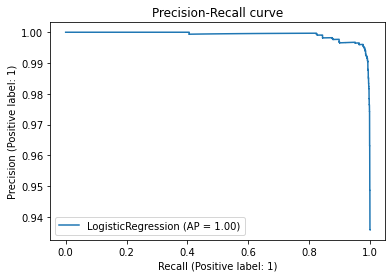

In [29]:
# precision recall score chart for training data on logistic regression
chart = PrecisionRecallDisplay.from_estimator(
    logistic_classifier, X_train, Y_train, name="LogisticRegression"
)
display = chart.ax_.set_title("Precision-Recall curve")

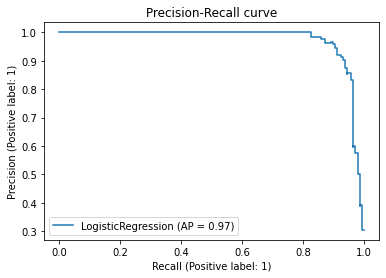

In [30]:
# precision recall score chart for testing data on logistic regression
chart = PrecisionRecallDisplay.from_estimator(
    logistic_classifier, X_test, Y_test, name="LogisticRegression"
)
display = chart.ax_.set_title("Precision-Recall curve")

<h1>Random Forest Classifier</h1>

In [31]:
# initializing the class RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [32]:
# training the classifier with train data
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [33]:
# accuracy score on train data for rfc
X_train_prediction_rfc = rfc.predict(X_train)
training_data_accuracy_rfc = accuracy_score(X_train_prediction_rfc, Y_train)
training_data_accuracy_rfc

0.9221300855143819

In [34]:
# accuracy score on test data for rfc
X_test_prediction_rfc = rfc.predict(X_test)
testing_data_accuracy_rfc = accuracy_score(X_test_prediction_rfc, Y_test)
testing_data_accuracy_rfc

0.947085201793722

In [35]:
# confusion matric for training data on rfc
confusion_matrix_train_rfc = confusion_matrix(Y_train, X_train_prediction_rfc)
confusion_matrix_train_rfc

array([[3845,   14],
       [ 587, 3272]], dtype=int64)

In [36]:
# confusion matrix for testing data on rfc
confusion_matrix_test_rfc = confusion_matrix(Y_test, X_test_prediction_rfc)
confusion_matrix_test_rfc

array([[963,   3],
       [ 56,  93]], dtype=int64)

In [37]:
# precision score for training data on rfc
precision_train_rfc = precision_score(Y_train, X_train_prediction_rfc)
print(precision_train_rfc)

0.995739500912964


In [38]:
# recall score for training data on rfc
recall_train_rfc = recall_score(Y_train, X_train_prediction_rfc)
print(recall_train_rfc)

0.8478880538999741


In [39]:
# precision score for testing data on rfc
precision_test_rfc = precision_score(Y_test, X_test_prediction_rfc)
print(precision_test_rfc)

0.96875


In [40]:
# recall score for testing data on rfc
recall_test_rfc = recall_score(Y_test, X_test_prediction_rfc)
print(recall_test_rfc)

0.6241610738255033


In [41]:
# classification report on training data for rfc
classific = classification_report(Y_train,X_train_prediction_rfc)
print('Classification Report: \n', classific)

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      3859
           1       1.00      0.85      0.92      3859

    accuracy                           0.92      7718
   macro avg       0.93      0.92      0.92      7718
weighted avg       0.93      0.92      0.92      7718



In [42]:
# classification report on testing data for rfc
classific = classification_report(Y_test, X_test_prediction_rfc)
print('Classification Report: \n', classific)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.97      0.62      0.76       149

    accuracy                           0.95      1115
   macro avg       0.96      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



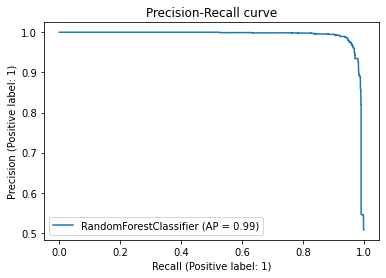

In [43]:
# precision recall score chart for testing data in rfc
chart = PrecisionRecallDisplay.from_estimator(
    rfc, X_train, Y_train, name="RandomForestClassifier"
)
display = chart.ax_.set_title("Precision-Recall curve")

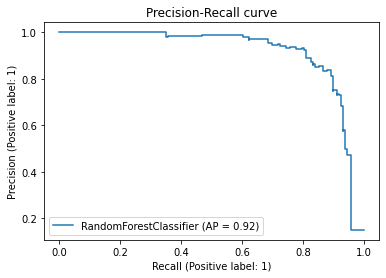

In [44]:
# precision recall score chart for testing data in rfc
chart = PrecisionRecallDisplay.from_estimator(
    rfc, X_test, Y_test, name="RandomForestClassifier"
)
display = chart.ax_.set_title("Precision-Recall curve")

<h1>KNeighborsClassifier</h1>

In [45]:
# initializing the class RandomForestClassifier
knc = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [46]:
# training the classifier with train data
knc.fit(X_train, Y_train)

KNeighborsClassifier()

In [47]:
# accuracy score on train data for knc
X_train_prediction_knc = knc.predict(X_train)
training_data_accuracy_knc = accuracy_score(X_train_prediction_knc, Y_train)
training_data_accuracy_knc

0.9977973568281938

In [48]:
# accuracy score on test data for knc
X_test_prediction_knc = knc.predict(X_test)
testing_data_accuracy_knc = accuracy_score(X_test_prediction_knc, Y_test)
testing_data_accuracy_knc

0.9551569506726457

In [49]:
# confusion matric for training data on knc
confusion_matrix_train_knc = confusion_matrix(Y_train, X_train_prediction_knc)
confusion_matrix_train_knc

array([[3850,    9],
       [   8, 3851]], dtype=int64)

In [50]:
# confusion matric for testing data on knc
confusion_matrix_test_knc = confusion_matrix(Y_test, X_test_prediction_knc)
confusion_matrix_test_knc

array([[963,   3],
       [ 47, 102]], dtype=int64)

In [51]:
# precision score for training data on knc
precision_train_knc = precision_score(Y_train, X_train_prediction_knc)
print(precision_train_knc)

0.9976683937823834


In [52]:
# recall score for training data on knc
recall_train_knc = recall_score(Y_train, X_train_prediction_knc)
print(recall_train_knc)

0.9979269240735942


In [53]:
# precision score for testing data on knc
precision_test_knc = precision_score(Y_test, X_test_prediction_knc)
print(precision_test_knc)

0.9714285714285714


In [54]:
# recall score for testing data on knc
recall_test_knc = recall_score(Y_test, X_test_prediction_knc)
print(recall_test_knc)

0.6845637583892618


In [55]:
# classification report on training data for knc
classific = classification_report(Y_train, X_train_prediction_knc)
print('Classification Report: \n', classific)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3859
           1       1.00      1.00      1.00      3859

    accuracy                           1.00      7718
   macro avg       1.00      1.00      1.00      7718
weighted avg       1.00      1.00      1.00      7718



In [56]:
# classification report on testing data for knc
classific = classification_report(Y_test, X_test_prediction_knc)
print('Classification Report: \n', classific)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.97      0.68      0.80       149

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



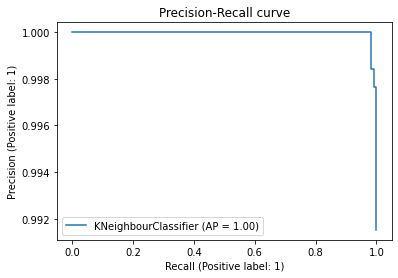

In [57]:
# precision recall score chart for training data in knc
chart = PrecisionRecallDisplay.from_estimator(
    knc, X_train, Y_train, name="KNeighbourClassifier"
)
display = chart.ax_.set_title("Precision-Recall curve")

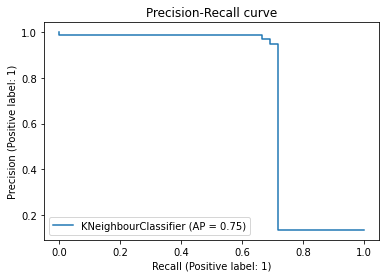

In [58]:
# precision recall score chart for testing data in knc
chart = PrecisionRecallDisplay.from_estimator(
    knc, X_test, Y_test, name="KNeighbourClassifier"
)
display = chart.ax_.set_title("Precision-Recall curve")

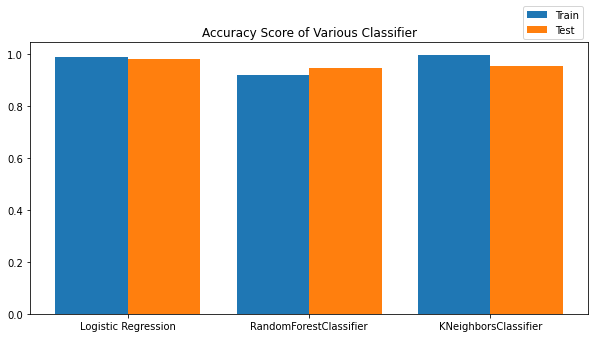

In [59]:
import matplotlib.pyplot as plt
# visualizing the accuracy score
models = ['Logistic Regression', 'RandomForestClassifier', 'KNeighborsClassifier']

train_values = [training_data_accuracy, training_data_accuracy_rfc, training_data_accuracy_knc]
test_values = [testing_data_accuracy, testing_data_accuracy_rfc, testing_data_accuracy_knc]

x_axis = np.arange(len(models))

plt.figure(figsize=(10,5))

plt.bar(x_axis -0.2, train_values, width=0.4, label = 'Train Data')
plt.bar(x_axis +0.2, test_values, width=0.4, label = 'Test Data')

plt.xticks(x_axis, models)

plt.legend(bbox_to_anchor =(1, 1.15))
plt.title('Accuracy Score of Various Classifier')

plt.show()

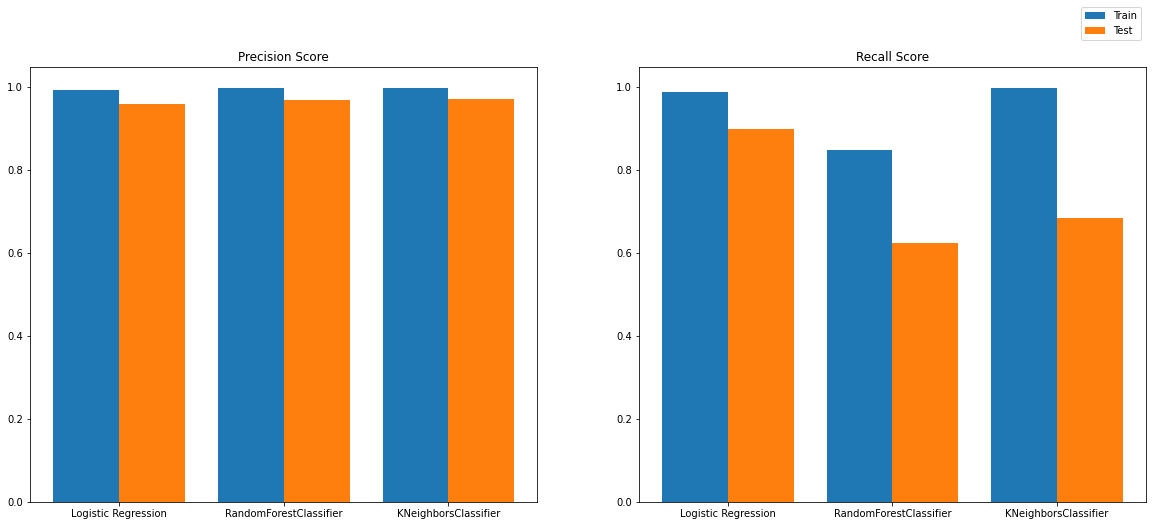

In [60]:
# visualizing the precision and recall score
models = ['Logistic Regression', 'RandomForestClassifier', 'KNeighborsClassifier']

precision_train_values = [precision_train_logistic, precision_train_rfc, precision_train_knc]
precision_test_values = [precision_test_logistic, precision_test_rfc, precision_test_knc]

recall_train_values = [recall_train_logistic, recall_train_rfc, recall_train_knc]
recall_test_values = [recall_test_logistic, recall_test_rfc, recall_test_knc]

x_axis = np.arange(len(models))
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.bar(x_axis -0.2, precision_train_values, width=0.4, label = 'Train Data')
plt.bar(x_axis +0.2, precision_test_values, width=0.4, label = 'Test Data')
plt.xticks(x_axis, models)
plt.title('Precision Score')

plt.subplot(1, 2, 2)
plt.bar(x_axis -0.2, recall_train_values, width=0.4, label = 'Train Data')
plt.bar(x_axis +0.2, recall_test_values, width=0.4, label = 'Test Data')

plt.xticks(x_axis, models)
plt.title('Recall Score')

plt.legend(bbox_to_anchor =(1, 1.15))

plt.show()

in classification model we can not just depend on the accuracy score for the performance metrics
so, here I have used precision and recall score as performance metrics for the analysis of
these three classifiers.

as with the analysis of precision and recall score on both train and test data for three models:<br/>
     1. Logistic Regression<br/>
     2. Random Forest Classifier<br/>
     3. KNeighbour Classifier

Here as the precision score and recall score for Logistic Regression is better than other model so I have found that the LogisticRegression is the best fit model for classifying spam mail.

# Save the best suited model

In [61]:
import joblib
# save ai model i.e Logistic Regression
saved_model = 'saved_model.sav'
joblib.dump(logistic_classifier, saved_model)

['saved_model.sav']

# Load the saved model

In [62]:
import joblib
loaded_model = joblib.load('saved_model.sav')

In [63]:
# function to display result
def check_result(value):
    if value == 1:
        print('The mail is Spam')
    elif value == 0:
        print('The mail is not Spam')

In [67]:
mail = input('Enter the Mail: ')

# apply stemming the input mail
steammed_mail = stemming(mail)

# converting into feture metrics
vectorized_mail = vectorizer.transform([steammed_mail])

# predict the value with loaded model
predicted_value = loaded_model.predict(vectorized_mail)

# displaying the result based on the predicted value
check_result(predicted_value)

Enter the Mail:  Not heard from U4 a while. Call 4 rude chat private line 01223585334 to cum. Wan 2C pics of me gettin shagged then text PIX to 8552. 2End send STOP 8552 SAM xxx


The mail is Spam


In [68]:
predicted_value = loaded_model.predict_proba(vectorized_mail)
print(predicted_value)

[[0.07935386 0.92064614]]
